<a href="https://colab.research.google.com/github/tanjatang/Data-Analysis/blob/main/Investigate_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## Dataset: 
Medical Appointment No Shows
## Content: 
110.527 medical appointments its 14 associated variables (characteristics).  The most important one if the patient show-up or no-show to the appointment. Data Dictionary

01 - PatientId
Identification of a patient
02 - AppointmentID
Identification of each appointment
03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
04 - DataMarcacaoConsulta
The day of the actuall appointment, when they have to visit the doctor.
05 - DataAgendamento
The day someone called or registered the appointment, this is before appointment of course.
06 - Age
How old is the patient.
07 - Neighbourhood
Where the appointment takes place.
08 - Scholarship
True of False.
09 - Hipertension
True or False
10 - Diabetes
True or False
Alcoholism
True or False
Handcap
True or False
SMS_received
1 or more messages sent to the patient.
No-show
True or False.

## Question to explore:
The goal for this project is to determine what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment.



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.AppointmentDay==df.ScheduledDay


0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
110497    False
110498    False
110499    False
110500    False
110501    False
110502    False
110503    False
110504    False
110505    False
110506    False
110507    False
110508    False
110509    False
110510    False
110511    False
110512    False
110513    False
110514    False
110515    False
110516    False
110517    False
110518    False
110519    False
110520    False
110521    False
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: b

In [ ]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.shape

(110527, 14)

In [ ]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
df.Scholarship.unique()

array([0, 1])

In [ ]:
df.SMS_received.unique()

array([0, 1])

In [ ]:
df.Hipertension.unique()

array([1, 0])

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.Age.dtype

dtype('int64')

In [ ]:
df['No-show'] = np.where(df['No-show']=='Yes',1,0)

In [ ]:
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: x.split('T')[0])

In [ ]:
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: x.split('T')[0])

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [ ]:
df.AppointmentDay==df.ScheduledDay

0          True
1          True
2          True
3          True
4          True
5         False
6         False
7         False
8          True
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19         True
20        False
21        False
22        False
23        False
24         True
25        False
26         True
27        False
28         True
29         True
          ...  
110497     True
110498     True
110499     True
110500     True
110501     True
110502     True
110503     True
110504     True
110505     True
110506     True
110507     True
110508     True
110509     True
110510     True
110511     True
110512     True
110513     True
110514     True
110515    False
110516    False
110517     True
110518    False
110519    False
110520    False
110521    False
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: b

In [ ]:
df['Gender'] = np.where(df['Gender']=='M',1,0)

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [ ]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)




In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Does alcoholism affect the prediction result if a patient will show up for their scheduled appointment? 

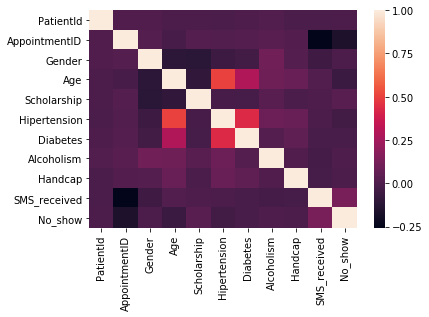

In [ ]:
sns.heatmap(df.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f150f817908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f150d4cfb70>]], dtype=object)

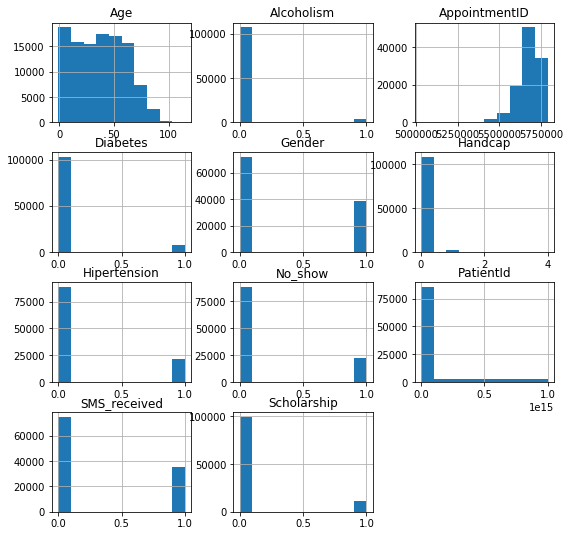

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize = (9,9))

In [ ]:
non_alcoholic = df.query('Alcoholism == 0').No_show.sum()




In [ ]:
non_alcoholic

21642

In [ ]:
alcoholism = df.query('Alcoholism == 1').No_show.sum()

In [ ]:
alcoholism

677

Text(0,0.5,'Propotion of no show ')

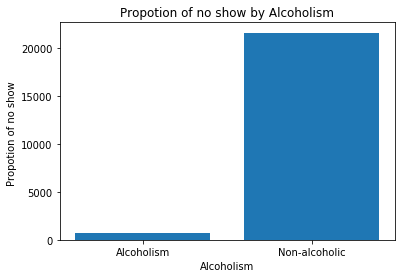

In [ ]:
locations = ['Non-alcoholic','Alcoholism']
plt.bar(locations,[non_alcoholic,alcoholism])
plt.title("Propotion of no show by Alcoholism")
plt.xlabel("Alcoholism")
plt.ylabel("Propotion of no show ")

### Does Age affect the prediction result if a patient will show up for their scheduled appointment?

In [ ]:
young = df.query('Age<25').No_show.sum()

In [ ]:
mid_age = df.query('25<=Age<50').No_show.sum()



In [ ]:
seniors = df.query('Age>=50').No_show.sum()



Text(0,0.5,'Propotion of no show ')

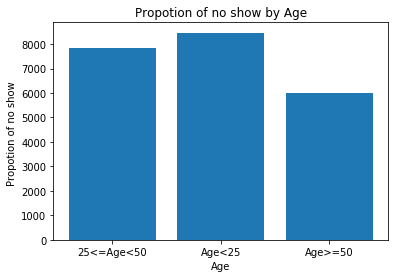

In [ ]:
plt.bar(['Age<25','25<=Age<50','Age>=50'], [young,mid_age,seniors])
plt.title("Propotion of no show by Age")
plt.xlabel("Age")
plt.ylabel("Propotion of no show ")


## Does Neighbourhood affect the prediction result if a patient will show up for their scheduled appointment?

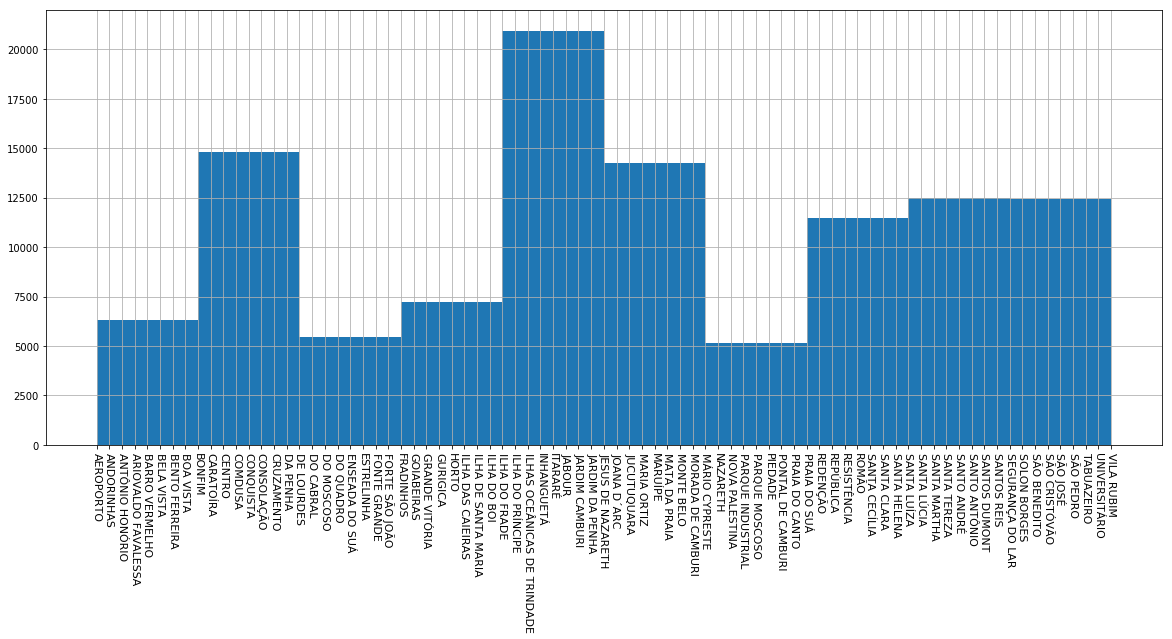

In [ ]:
plt.figure(figsize=(20,8))
df['Neighbourhood'].hist(xlabelsize=11,xrot=-90)

In [ ]:
nb = df.groupby('Neighbourhood').No_show.sum()

Text(0,0.5,'Propotion of no show ')

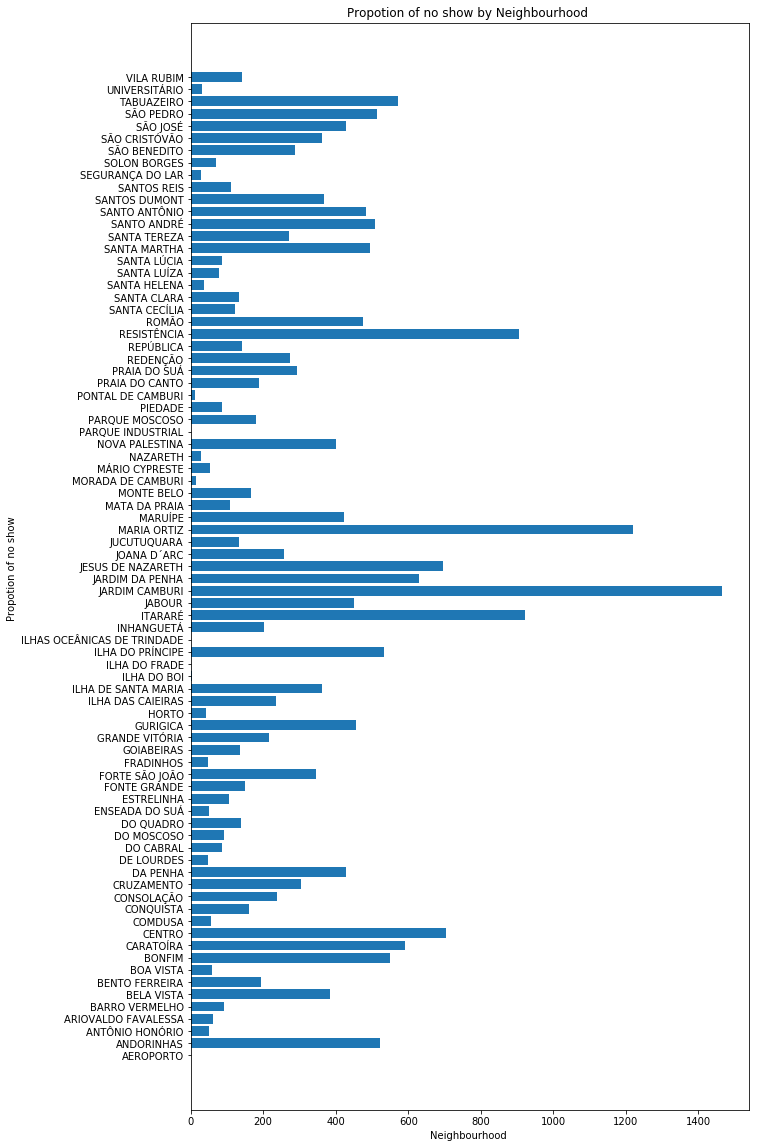

In [ ]:
plt.figure(figsize=(10,20))

plt.barh(nb.index, nb)
plt.title("Propotion of no show by Neighbourhood ")
plt.xlabel("Neighbourhood ")
plt.ylabel("Propotion of no show ")

### Does SMS_received affect the prediction result if a patient will show up for their scheduled appointment?

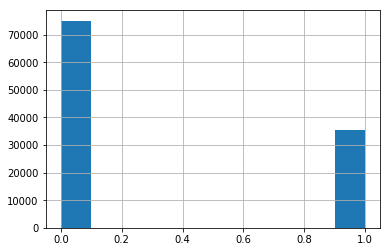

In [ ]:
df['SMS_received'].hist()

In [ ]:
no_sms = df.query('SMS_received == 0').No_show.sum()


In [ ]:
sms = df.query('SMS_received == 1').No_show.sum()

Text(0,0.5,'Propotion of no show ')

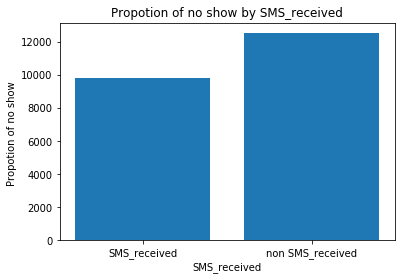

In [ ]:
plt.bar(['non SMS_received','SMS_received'], [no_sms,sms])
plt.title("Propotion of no show by SMS_received")
plt.xlabel("SMS_received")
plt.ylabel("Propotion of no show ")


### Does Handcap affect the prediction result if a patient will show up for their scheduled appointment?¶

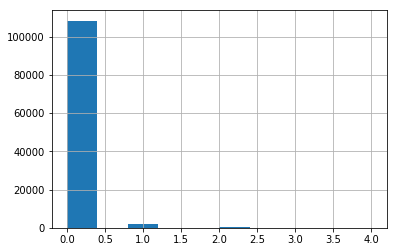

In [ ]:
df['Handcap'].hist()

In [ ]:
no_Handcap = df.query('Handcap == 0').No_show.sum()

In [ ]:
Handcap = df.query('Handcap == 1').No_show.sum()

Text(0,0.5,'Propotion of no show ')

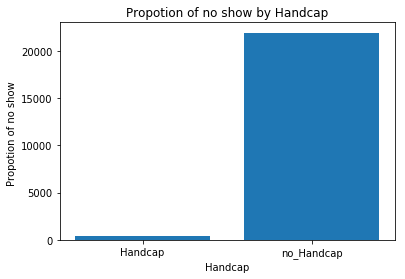

In [ ]:
plt.bar(['no_Handcap','Handcap'], [no_Handcap,Handcap])
plt.title("Propotion of no show by Handcap")
plt.xlabel("Handcap")
plt.ylabel("Propotion of no show ")


### Does Diabetes affect the prediction result if a patient will show up for their scheduled appointment?¶

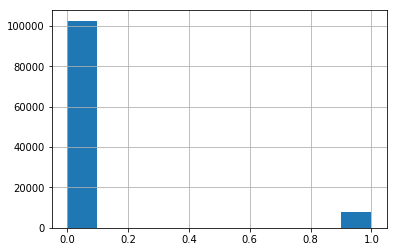

In [ ]:
df['Diabetes'].hist()

In [ ]:
non_Diabetes = df.query('Diabetes == 0').No_show.sum()

In [ ]:
Diabetes = df.query('Diabetes == 1').No_show.sum()

Text(0,0.5,'Propotion of no show ')

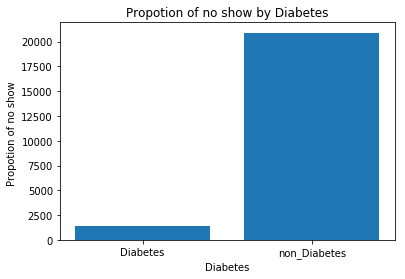

In [ ]:
plt.bar(['non_Diabetes','Diabetes'], [non_Diabetes,Diabetes])
plt.title("Propotion of no show by Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Propotion of no show ")


### Does Hipertension affect the prediction result if a patient will show up for their scheduled appointment?¶

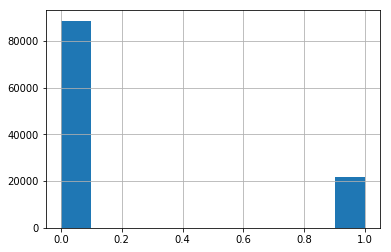

In [ ]:
df['Hipertension'].hist()

In [ ]:
non_Hipertension = df.query('Hipertension == 0').No_show.sum()

In [ ]:
Hipertension = df.query('Hipertension == 1').No_show.sum()

Text(0,0.5,'Propotion of no show ')

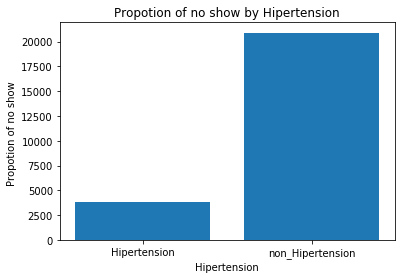

In [ ]:
plt.bar(['non_Hipertension','Hipertension'], [non_Diabetes,Hipertension])
plt.title("Propotion of no show by Hipertension")
plt.xlabel("Hipertension")
plt.ylabel("Propotion of no show ")


### Does Scholarship affect the prediction result if a patient will show up for their scheduled appointment?¶

Text(0,0.5,'Distribution')

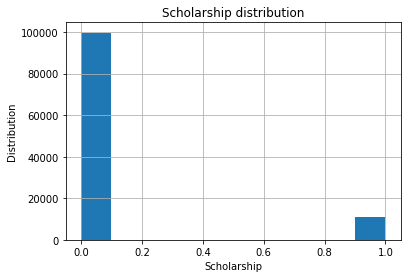

In [ ]:
df["Scholarship"].hist() #   0: Female, 1: Men
plt.title("Scholarship distribution")
plt.xlabel('Scholarship')
plt.ylabel('Distribution')

In [ ]:
no_Scholarship = df.query('Scholarship == 0').No_show.sum()

In [ ]:
Scholarship = df.query('Scholarship == 1').No_show.sum()

Text(0,0.5,'Propotion of no show ')

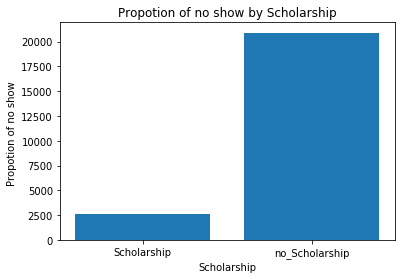

In [ ]:
plt.bar(['no_Scholarship','Scholarship'], [non_Diabetes,Scholarship])
plt.title("Propotion of no show by Scholarship")
plt.xlabel("Scholarship")
plt.ylabel("Propotion of no show ")


### Does Gender affect the prediction result if a patient will show up for their scheduled appointment?¶

Text(0,0.5,'Distribution')

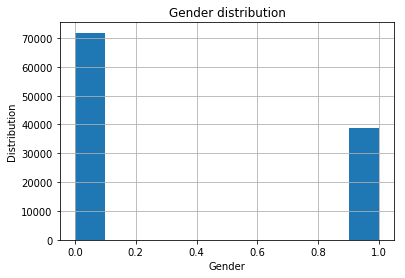

In [ ]:
df["Gender"].hist() #   0: Female, 1: Men
plt.title("Gender distribution")
plt.xlabel('Gender')
plt.ylabel('Distribution')

In [ ]:
Female = df.query('Gender == 0').No_show.sum()

In [ ]:
Men = df.query('Gender == 1').No_show.sum()

Text(0,0.5,'Propotion of no show ')

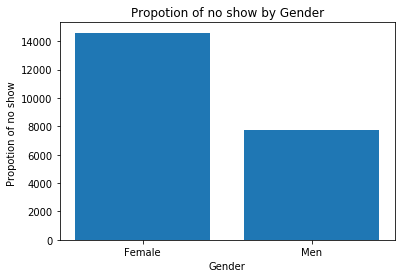

In [ ]:
plt.bar(['Female','Men'], [Female,Men])
plt.title("Propotion of no show by Gender")
plt.xlabel("Gender")
plt.ylabel("Propotion of no show ")

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# import seaborn as sns
# sns.pairplot(df ,hue ='No_show')


# Conclusion: 
1. Neighbourhood affect the result if a patient will show up for their scheduled appointment.
Because the patients who do not show up for the scheduled appointment are various from neighbourhood.

2. The factor SMS_received affect the result if a patient will show up for their scheduled appointment.
Because most of the patients who do not show up for the scheduled appointment did not receive SMS.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0